In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


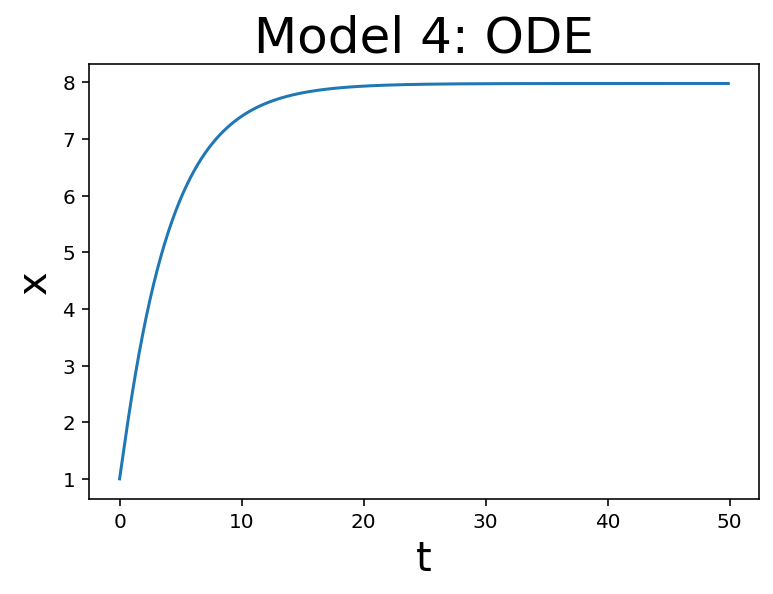

In [9]:
gamma = 2
lamda = 1
delta = 0.25 
alpha = 3.
beta = 1.
x0=1

Delta_t = 0.1
Nsteps = 500
x = zeros(Nsteps) 
x[0] = x0 
def f_gene(x): 
    return gamma*(alpha*(x**2))/((alpha*(x**2))+beta)+lamda*beta/((alpha*x**2)+beta)-delta*x

for n in arange(1, Nsteps): 
    x[n] = x[n-1] + Delta_t*f_gene(x[n-1])

####### Plot the solution #########
t = Delta_t*arange(Nsteps) 
plot(t, x)
title("Model 4: ODE", fontsize = 25)
xlabel('t', fontsize=20)
ylabel('x', fontsize=20);

hello


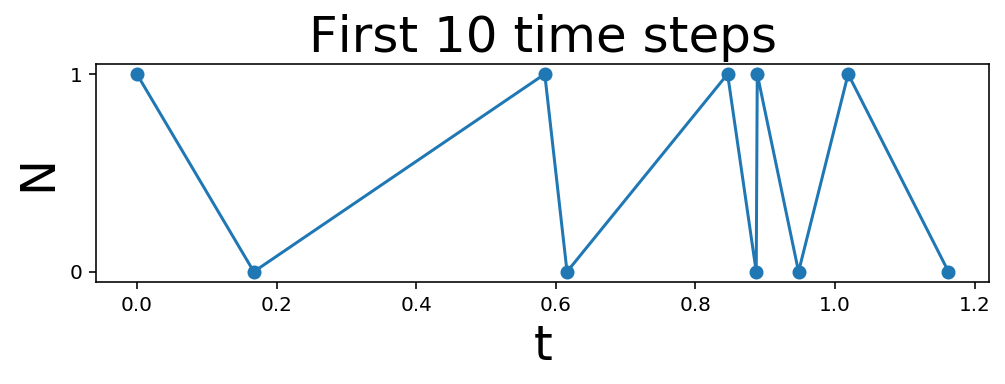

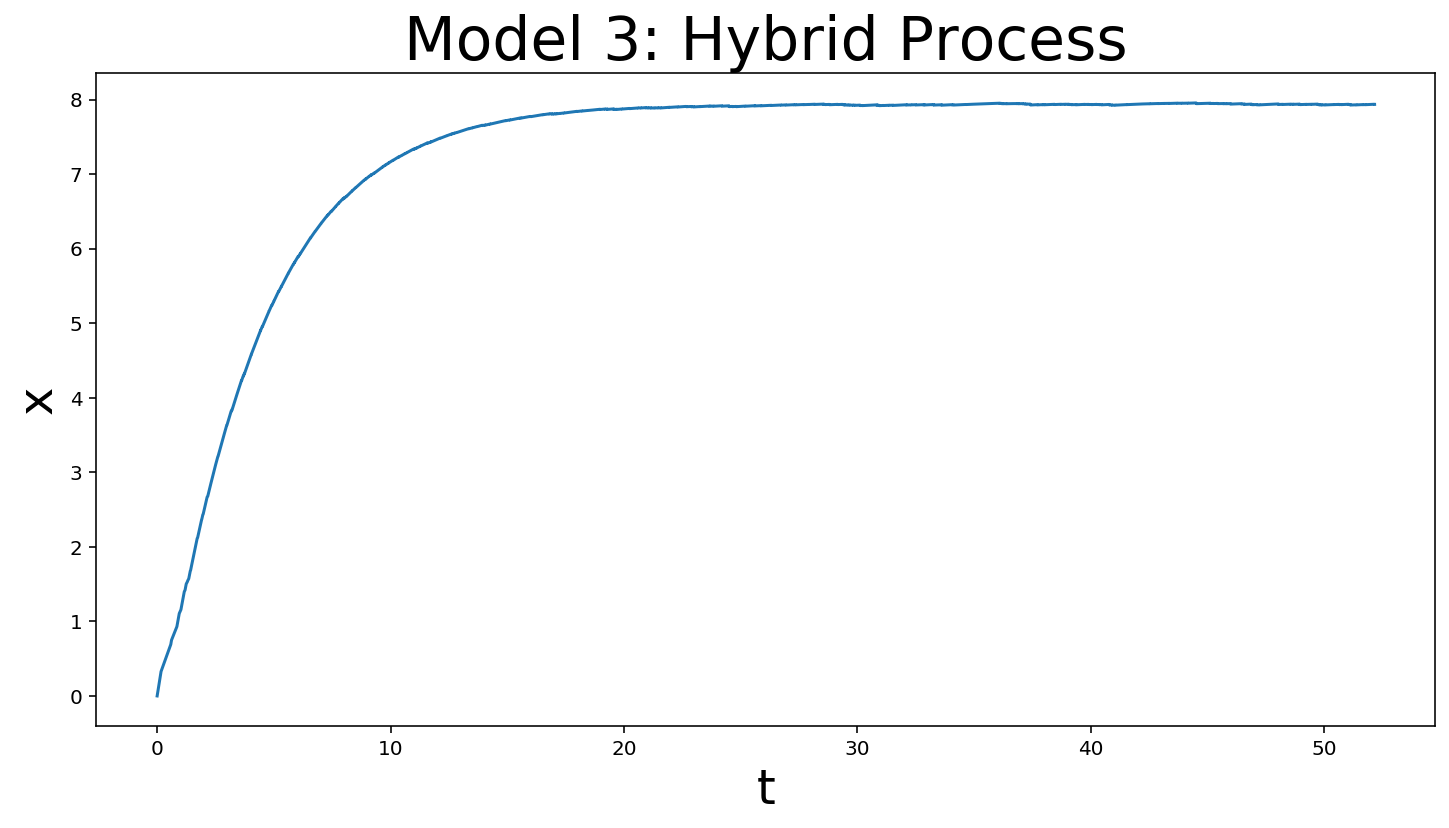

In [2]:
epsilon = 0.1
gamma = 2.
lamda = 1
delta = 0.25
alpha = 1.
beta = 1.
n0 = 0
s0 = 1
Nsteps = 1000
S = zeros(Nsteps)
S[0] = s0
N = zeros(Nsteps)
N[0] = n0
T = zeros(Nsteps)
T[0] = 0
def fullycoupledhybrid(alpha, beta, gamma, lamda, epsilon, s0, n0, Nsteps):
    for j in arange(1, Nsteps):
        u = rand(1)[0]
        rate = beta/epsilon if S[j-1]==1 else (alpha*(N[j-1]**2))/(epsilon)
        tau = -log(u)/rate
        T[j] = T[j-1] + tau
        S[j] = 0 if S[j-1]==1 else 1
        ## update x using the exact solution above
        N[j] = N[j-1]*exp(-delta*tau) + (gamma*S[j-1]+lamda*(1-S[j-1]))/delta*(1 - exp(-delta*tau))
    return T, S, N

## I wan't to make a plot for the limiting ODE solution

T,S,N = fullycoupledhybrid(alpha, beta, gamma, lamda, epsilon, s0, n0, Nsteps)

#Tinf = linspace(0, T[-1], len(N))
#Savg = (alpha*N**2)/((alpha*N**2) + beta*ones(len(N)))
#Xinf = x0*exp(-delta*Tinf) + gamma*Savg/delta*(1 - exp(-delta*Tinf))

figure(1, [8, 2])
plot(T[:10], S[:10], '-o')
yticks([0, 1])
title('First 10 time steps', fontsize=25)
xlabel('t', fontsize=24)
ylabel('N', fontsize=24);

figure(3, [12, 6])
plot(T, N)
#plot(Tinf, Xinf, 'k')
title("Model 3: Hybrid Process", fontsize = 30)
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);
print("hello")

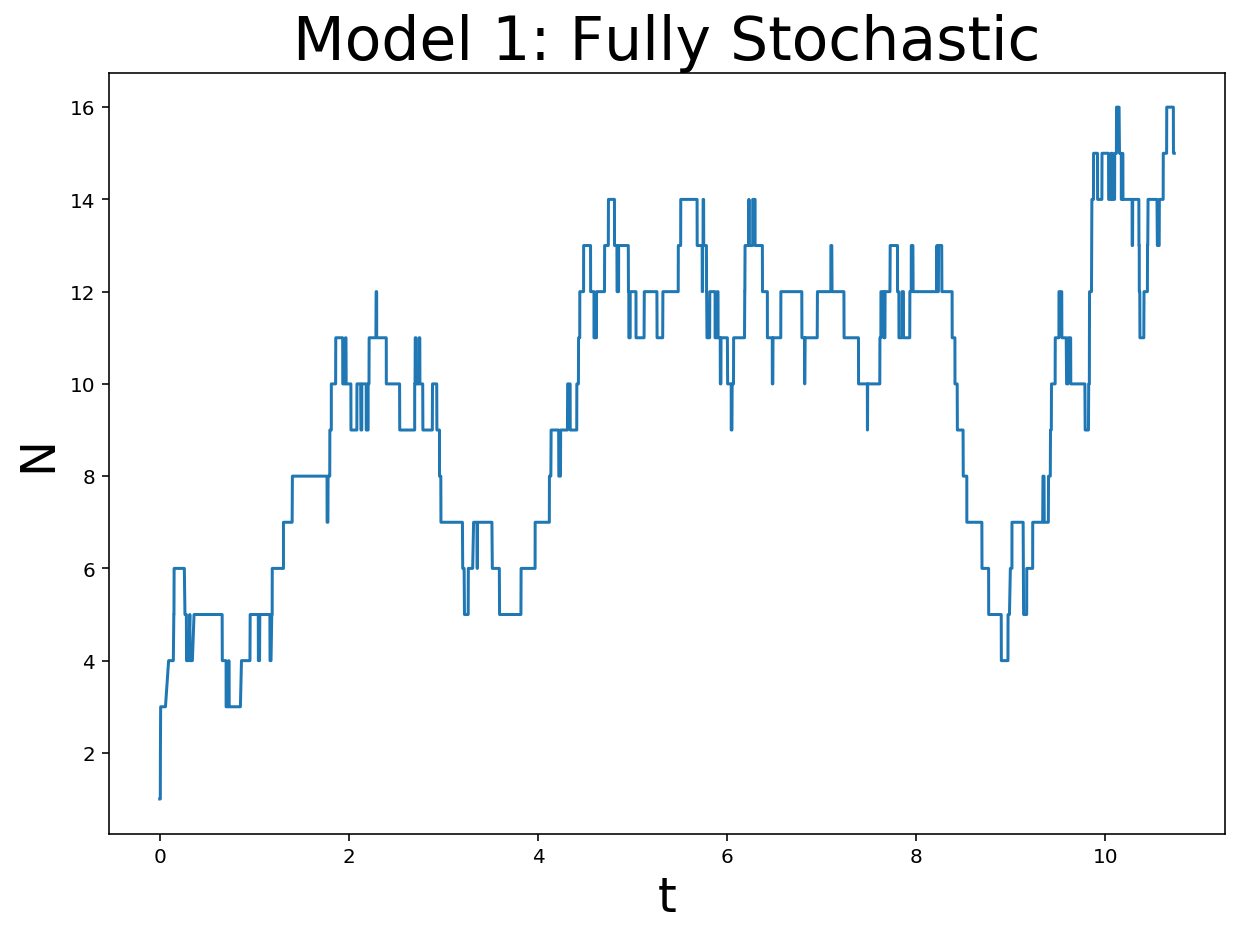

In [11]:
epsilon = 0.1
gamma = 1
lamda = 1
delta = 1
alpha = 1
beta = 100
s0 = 0
n0 = 1
Nsteps = 10000
def stochastic_pp(alpha, beta, gamma, lamda, epsilon, s0, n0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    S = zeros(Nsteps)
    S[0] = s0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        s = S[j-1]
        n = N[j-1]
        if s == 0:
            rate = (alpha*n**2)/epsilon
        if s == 1:
            rate = beta/epsilon

        combined_rate = rate + (gamma*s + lamda*(1-s))/epsilon + (delta*(n))
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau
        probability_vector = array([rate, (gamma*s + lamda*(1-s))/epsilon, (delta*(n))])/combined_rate
        cummulative_probability_vector = cumsum(probability_vector)
        u2 = rand(1)
        if u2 < cummulative_probability_vector[0]:
            if s == 0:
                S[j] = 1
            else:
                S[j] = 0
            N[j] = N[j-1]
        elif u2 < cummulative_probability_vector[1]:
            N[j] = N[j-1] + 1
            S[j] = S[j-1]
        else:
            N[j] = N[j-1] - 1
            S[j] = S[j-1]
    return T, S, N

figure(1, [10, 7])

###### Stochastic and ODE trajectories
T, S, N = stochastic_pp(alpha, beta, gamma, lamda, epsilon, s0, n0, Nsteps)

plot(T, N)
title("Model 1: Fully Stochastic", fontsize = 30)
xlabel('t', fontsize=24)
ylabel('N', fontsize=24);

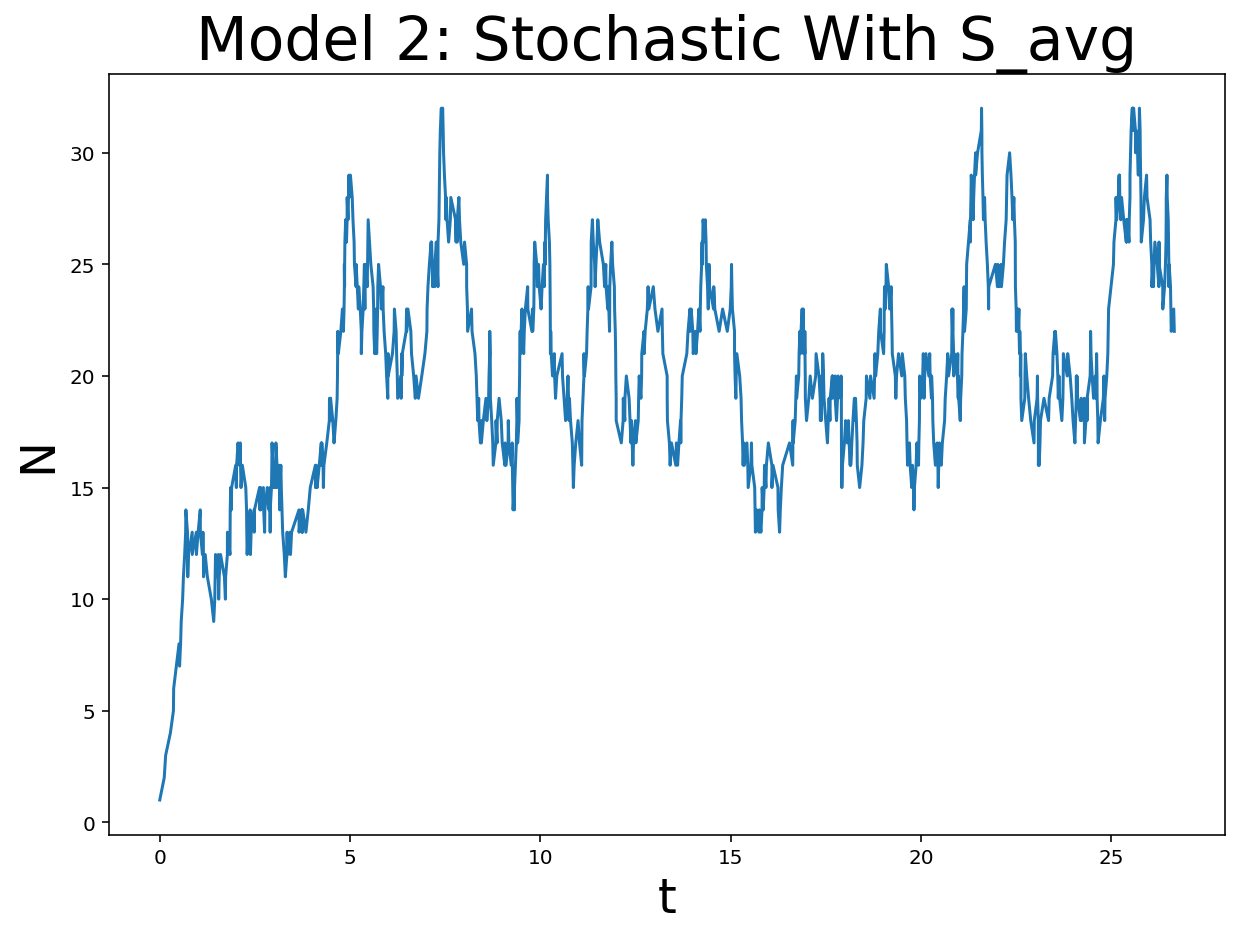

In [12]:
epsilon = 0.1
gamma = 2
lamda = 1
delta = 1
alpha = 1
beta = 1
s0 = 0
n0 = 1
Nsteps = 1000
def stochastic_pp_nomarkov(alpha, beta, gamma, lamda, epsilon, n0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        s = (alpha*n**2)/((alpha*n**2)+beta)
        combined_rate = (gamma*s + lamda*(1-s))/epsilon + (delta*n)
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau
        probability_vector = array([(gamma*s + lamda*(1-s))/epsilon, (delta*(n))])/combined_rate
        cummulative_probability_vector = cumsum(probability_vector)
        u2 = rand(1)
        if u2 < cummulative_probability_vector[0]:
            N[j] = N[j-1] + 1
        else:
            N[j] = N[j-1] - 1
            
    return T, N

figure(1, [10, 7])

###### Stochastic and ODE trajectories
T,N = stochastic_pp_nomarkov(alpha, beta, gamma, lamda, epsilon, n0, Nsteps)

plot(T, N)
title("Model 2: Stochastic With S_avg", fontsize = 30)
xlabel('t', fontsize=24)
ylabel('N', fontsize=24);


(0, 75)

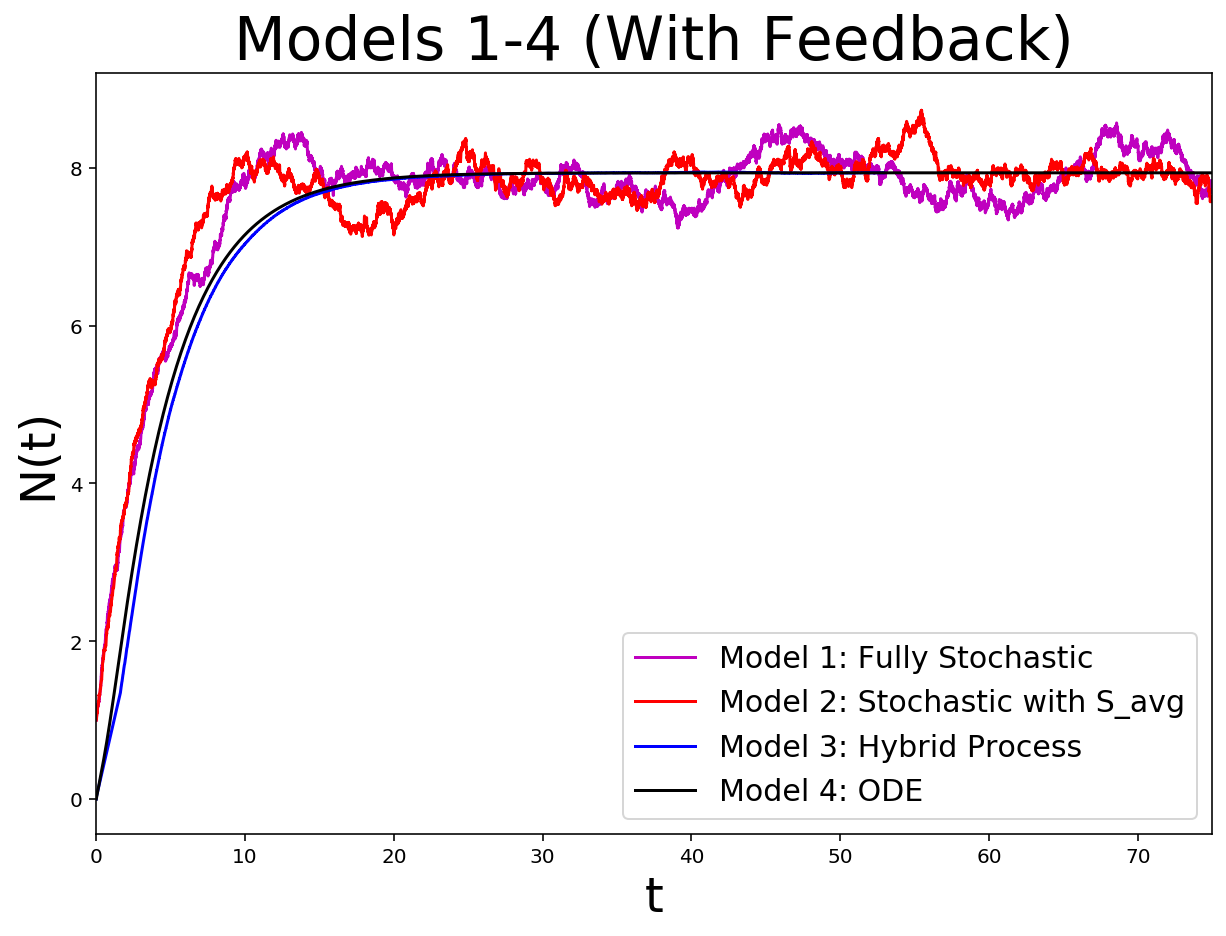

In [20]:
epsilon = 0.01
gamma = 2.
lamda = 1
delta = 0.25
alpha = 1.
beta = 1.
n0 = 1
s0 = 1
Delta_t = 0.1
Nsteps = 1000
x = zeros(Nsteps) 



T1, S1, N1 = stochastic_pp(alpha, beta, gamma, lamda, epsilon, s0, 1/epsilon, Nsteps*100)

T2,N2 = stochastic_pp_nomarkov(alpha, beta, gamma, lamda, epsilon, 1/epsilon, Nsteps*100)

T3,S3,N3 = fullycoupledhybrid(alpha, beta, gamma, lamda, epsilon, s0, n0, 10000)

for n in arange(1, Nsteps): 
    x[n] = x[n-1] + Delta_t*f_gene(x[n-1])
T4 = Delta_t*arange(Nsteps) 
figure(1, [10, 7]) 
title('Models 1-4 (With Feedback)', fontsize = 30)
xlabel('t', fontsize = 24)
ylabel('N(t)', fontsize = 24)
plot(T1,(epsilon)*N1, 'm', label = "Model 1: Fully Stochastic")
plot(T2,epsilon*N2, 'r',label = "Model 2: Stochastic with S_avg")
plot(T3,N3,'b',label = "Model 3: Hybrid Process")
plot(T4,x, 'k',label = "Model 4: ODE",);
legend(fontsize = 15)
xlim([0,75])